# Классификация на реальных данных

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *

In [63]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")

In [64]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [67]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [68]:
y.shape, X.shape

((768,), (768, 8))

In [69]:
from sklearn.linear_model import LogisticRegression


In [70]:
logistic = LogisticRegression(max_iter = 1000)
logistic.fit(X, y)

LogisticRegression(max_iter=1000)

In [71]:
print("Коэффициенты: \n", logistic.coef_[0])

Коэффициенты: 
 [ 1.22505160e-01  3.51099563e-02 -1.32987359e-02  7.78690277e-04
 -1.17362787e-03  8.96527929e-02  8.67790286e-01  1.49830228e-02]


Свободный коэффициент не выводится по причине ненадобности (абстрактный)

In [72]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.12250515989925868
Glucose 0.03510995630887341
BloodPressure -0.013298735878331327
SkinThickness 0.0007786902767586193
Insulin -0.00117362786829671
BMI 0.08965279293917926
DiabetesPedigreeFunction 0.8677902863707057
Age 0.014983022846181396


In [73]:
y_pred = logistic.predict(X)

In [74]:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [75]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[444,  56],
       [112, 156]])

<Axes: >

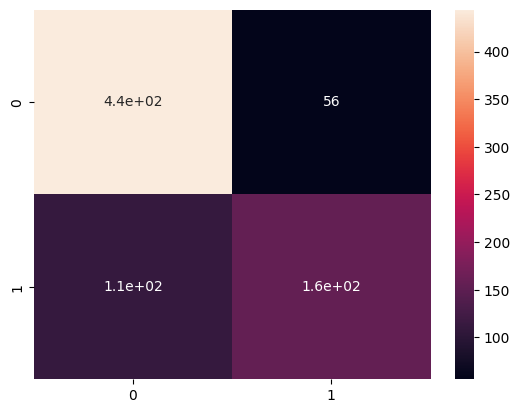

In [76]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [77]:
logistic.score(X, y)

0.78125

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
poly = PolynomialFeatures(2)

In [80]:
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]], shape=(768, 45))

In [81]:
polynomial = LogisticRegression(max_iter = 10000) 
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)


C:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ошибка количества итераций намеренная, показывает неэффективность обучения модели с помощью полиноминалов (требует слишком много итераций)

# Самостоятельные задания

## 1 меняем аргумент штрафа на l2

In [82]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter = 1000, penalty='l2')

In [83]:
logistic.fit(X, y)

LogisticRegression(max_iter=1000)

In [84]:
print("Коэффициенты: \n", logistic.coef_[0])

Коэффициенты: 
 [ 1.22505160e-01  3.51099563e-02 -1.32987359e-02  7.78690277e-04
 -1.17362787e-03  8.96527929e-02  8.67790286e-01  1.49830228e-02]


In [85]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.12250515989925868
Glucose 0.03510995630887341
BloodPressure -0.013298735878331327
SkinThickness 0.0007786902767586193
Insulin -0.00117362786829671
BMI 0.08965279293917926
DiabetesPedigreeFunction 0.8677902863707057
Age 0.014983022846181396


пенальти не повлияло, поменяем алгоритм решений

In [86]:
logistic = LogisticRegression(max_iter = 1000, penalty='l2', solver = 'newton-cg')

In [87]:
logistic.fit(X, y)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [88]:
print("Коэффициенты: \n", logistic.coef_[0])

Коэффициенты: 
 [ 1.22494915e-01  3.51097295e-02 -1.32993746e-02  7.80091391e-04
 -1.17373871e-03  8.96489051e-02  8.67773172e-01  1.49837032e-02]


In [89]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.12249491461282824
Glucose 0.03510972950720704
BloodPressure -0.013299374552132457
SkinThickness 0.0007800913911970002
Insulin -0.0011737387112631661
BMI 0.08964890514094535
DiabetesPedigreeFunction 0.8677731718603943
Age 0.014983703234052896


изменение алгоритма решений очень слабо повлияло

## 2 Другие модели классификации

a) без ядра

Accuracy: 0.7682291666666666
Confusion matrix:
[[457  43]
 [135 133]]


<Axes: >

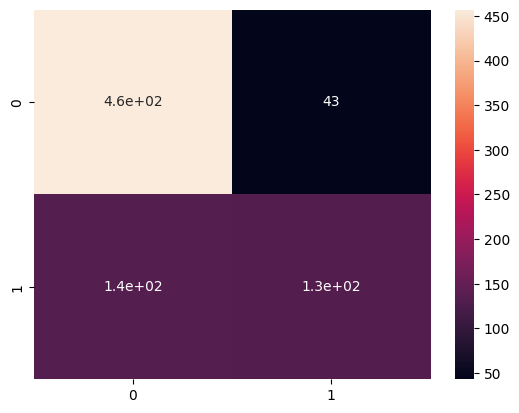

In [90]:
from sklearn.svm import SVC
from sklearn import metrics
svm_linear = SVC()
svm_linear.fit(X, y)
y_pred_svm_linear = svm_linear.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred_svm_linear))
print("Confusion matrix:")
print(metrics.confusion_matrix(y, y_pred_svm_linear))
sns.heatmap(metrics.confusion_matrix(y, y_pred_svm_linear), annot=True)

b) линейное ядро

Accuracy: 0.77734375
Confusion matrix:
[[443  57]
 [114 154]]


<Axes: >

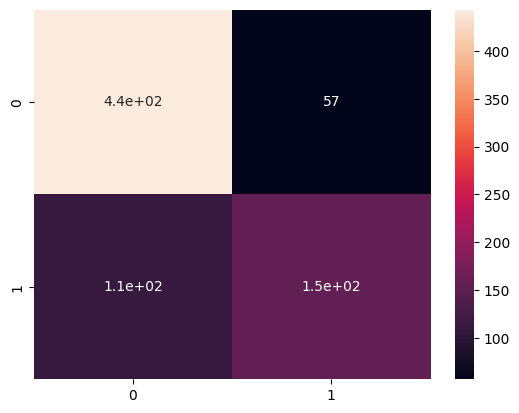

In [91]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)
y_pred_svm_linear = svm_linear.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred_svm_linear))
print("Confusion matrix:")
print(metrics.confusion_matrix(y, y_pred_svm_linear))
sns.heatmap(metrics.confusion_matrix(y, y_pred_svm_linear), annot=True)

c) Гауссовое ядро

Accuracy: 0.7682291666666666
Confusion matrix:
[[457  43]
 [135 133]]


<Axes: >

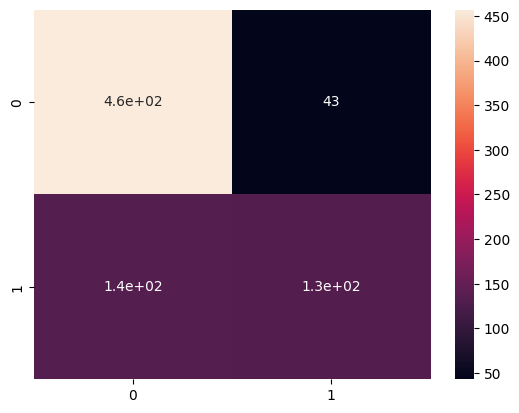

In [92]:

svm_linear = SVC(kernel='rbf')
svm_linear.fit(X, y)
y_pred_svm_linear = svm_linear.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred_svm_linear))
print("Confusion matrix:")
print(metrics.confusion_matrix(y, y_pred_svm_linear))
sns.heatmap(metrics.confusion_matrix(y, y_pred_svm_linear), annot=True)

d) Полиноминальное ядро

Accuracy: 0.7760416666666666
Confusion matrix:
[[465  35]
 [137 131]]


<Axes: >

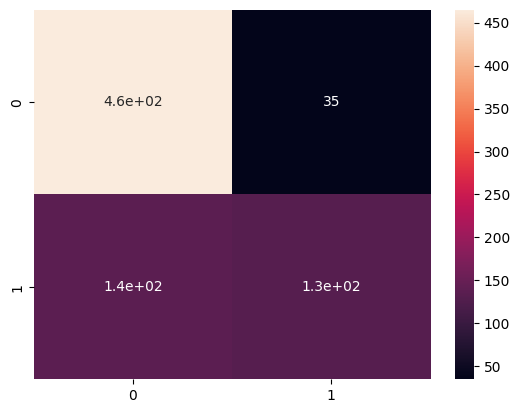

In [93]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X, y)
y_pred_svm_poly = svm_poly.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred_svm_poly))
print("Confusion matrix:")
print(metrics.confusion_matrix(y, y_pred_svm_poly))
sns.heatmap(metrics.confusion_matrix(y, y_pred_svm_poly), annot=True)

ii метод ближайших соседей

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((652, 8), (116, 8), (652,), (116,))

In [96]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [97]:
print(f'accuracy: {accuracy_score(y_test, model.predict(X_test)) :.3}')

accuracy: 0.629


iii Многослойный перцептрон

In [98]:
from sklearn.neural_network import MLPClassifier

# Создание модели
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200, random_state=0)

# Обучение модели
mlp.fit(X_train, y_train)

MLPClassifier(random_state=0)

In [99]:
# Оценка качества
score = mlp.score(X_test, y_test)
print(f"Accuracy: {score:.3f}")

Accuracy: 0.690


iv дерево решений

Accuracy: 1.0
Confusion matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Unique classes in test set: {0, 1, 2}


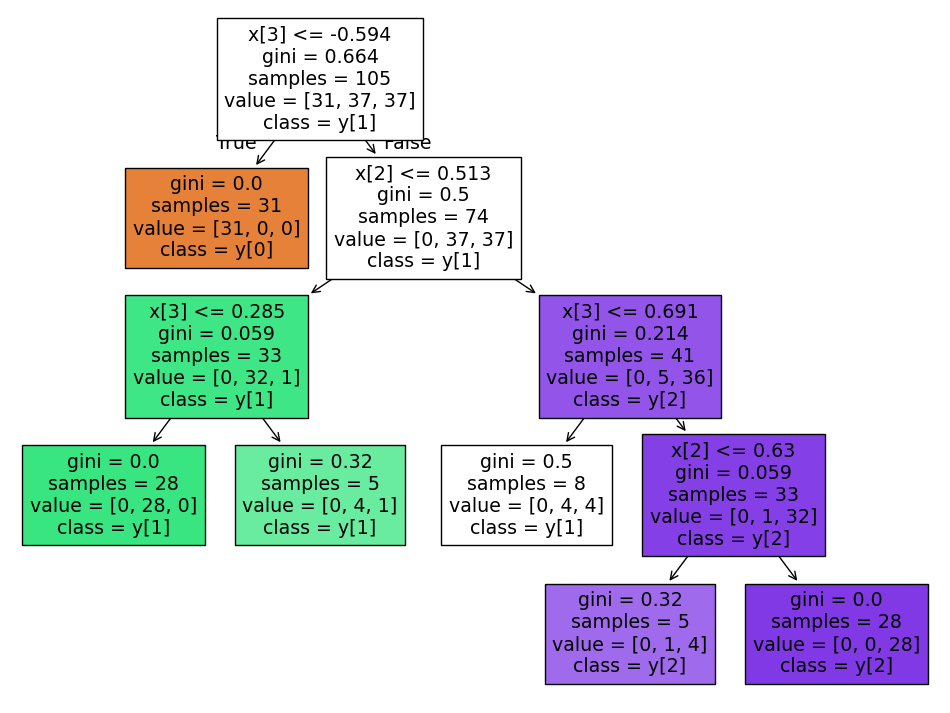

In [109]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Создание объекта классификатора с ограничениями
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)

# Обучение модели на обучающей выборке
clf.fit(X_train, y_train)

# Предсказание классов для тестовой выборки
y_pred = clf.predict(X_test)

# Оценка точности классификации
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Вывод матрицы классификации
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Проверка наличия всех классов в тестовой выборке
unique_classes = set(y_test)
print("Unique classes in test set:", unique_classes)

# Визуализация дерева решений
plt.figure(figsize=(12, 9))
plot_tree(clf, filled=True, feature_names=None, class_names=True)
plt.show()


v Наивный байесовский классификатор

In [101]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.7155172413793104
Confusion matrix:
 [[59 11]
 [22 24]]


## 3 Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def ml():
    models = []
    models.append(('SVM без ядра', SVC()))
    models.append(('SVM линейное ядро', SVC(kernel='linear', C=1)))
    models.append(('SVM гауссовое ядро', SVC(kernel='rbf', C=1)))
    models.append(('SVM полтномиальное ядро', SVC(kernel='poly', degree=3, C=1)))
    models.append(('KNN(метод ближайших соседей)', KNeighborsClassifier(n_neighbors=5)))
    models.append(('Многослойный перцептрон', MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000)))
    models.append(('Дерево решений', DecisionTreeClassifier()))
    models.append(('Наивный байесовский классификатор', GaussianNB()))
    
    results = []
    for name, model in models:
        model_pipeline = make_pipeline(StandardScaler(), model)
        model_pipeline.fit(X_train, y_train)
        y_pred = model_pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append((name, acc, confusion_matrix(y_test, y_pred)))
    return results

In [103]:
ml()

[('SVM без ядра',
  0.7413793103448276,
  array([[62,  8],
         [22, 24]])),
 ('SVM линейное ядро',
  0.7844827586206896,
  array([[64,  6],
         [19, 27]])),
 ('SVM гауссовое ядро',
  0.7413793103448276,
  array([[62,  8],
         [22, 24]])),
 ('SVM полтномиальное ядро',
  0.7155172413793104,
  array([[66,  4],
         [29, 17]])),
 ('KNN(метод ближайших соседей)',
  0.6724137931034483,
  array([[57, 13],
         [25, 21]])),
 ('Многослойный перцептрон',
  0.7586206896551724,
  array([[61,  9],
         [19, 27]])),
 ('Дерево решений',
  0.6293103448275862,
  array([[55, 15],
         [28, 18]])),
 ('Наивный байесовский классификатор',
  0.7155172413793104,
  array([[59, 11],
         [22, 24]]))]

## 4 Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (iris).

In [104]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

# загрузка данных
iris = load_iris()

# преобразуем данные в DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris.target_names[iris.target]


# проверим, что все загрузилось корректно
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [111]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score


# загружаем датасет ирисов
iris = load_iris()

# создаем датафрейм с данными и целевым признаком
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris.target_names[iris.target]

# проверим, что все загрузилось корректно
print(iris_df.head())

# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# обучаем модель логистической регрессии
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# выводим матрицу классификации и оценку точности для логистической регрессии
print("\nЛогистическая регрессия:")
print("\n",confusion_matrix(y_test, y_pred_lr))
print("\nAccuracy: ", accuracy_score(y_test, y_pred_lr))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Логистическая регрессия:

 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy:  1.0


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# разделение на признаки и метки
X = iris_df.drop(['target', 'species'], axis=1)
y = iris_df['target']

# разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# стандартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [114]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def ml():
    models = []
    models.append(('SVM без ядра', SVC()))
    models.append(('SVM линейное ядро', SVC(kernel='linear', C=1)))
    models.append(('SVM гауссовое ядро', SVC(kernel='rbf', C=1)))
    models.append(('SVM полиномиальное ядро', SVC(kernel='poly', degree=3, C=1)))
    models.append(('KNN(метод ближайших соседей)', KNeighborsClassifier(n_neighbors=5)))
    models.append(('Многослойный перцептрон', MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000)))
    models.append(('Дерево решений', DecisionTreeClassifier()))
    models.append(('Наивный байесовский классификатор', GaussianNB()))
    
    results = []
    for name, model in models:
        model_pipeline = make_pipeline(StandardScaler(), model)
        model_pipeline.fit(X_train, y_train)
        y_pred = model_pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append((name, acc, confusion_matrix(y_test, y_pred)))
    return results

In [115]:
ml()

C:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[('SVM без ядра',
  1.0,
  array([[19,  0,  0],
         [ 0, 13,  0],
         [ 0,  0, 13]])),
 ('SVM линейное ядро',
  0.9777777777777777,
  array([[19,  0,  0],
         [ 0, 12,  1],
         [ 0,  0, 13]])),
 ('SVM гауссовое ядро',
  1.0,
  array([[19,  0,  0],
         [ 0, 13,  0],
         [ 0,  0, 13]])),
 ('SVM полиномиальное ядро',
  0.9555555555555556,
  array([[19,  0,  0],
         [ 0, 13,  0],
         [ 0,  2, 11]])),
 ('KNN(метод ближайших соседей)',
  1.0,
  array([[19,  0,  0],
         [ 0, 13,  0],
         [ 0,  0, 13]])),
 ('Многослойный перцептрон',
  0.7777777777777778,
  array([[19,  0,  0],
         [ 0,  3, 10],
         [ 0,  0, 13]])),
 ('Дерево решений',
  1.0,
  array([[19,  0,  0],
         [ 0, 13,  0],
         [ 0,  0, 13]])),
 ('Наивный байесовский классификатор',
  0.9777777777777777,
  array([[19,  0,  0],
         [ 0, 12,  1],
         [ 0,  0, 13]]))]